In [0]:
!pip install scikit-surprise
import numpy as np
import surprise  # run 'pip install scikit-surprise' to install surprise
import os
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate

In [0]:
class MatrixFacto(surprise.AlgoBase):
    '''A basic rating prediction algorithm based on matrix factorization.'''
    
    def __init__(self, learning_rate, n_epochs, n_factors):
        
        self.lr = learning_rate  # learning rate for SGD
        self.n_epochs = n_epochs  # number of iterations of SGD
        self.n_factors = n_factors  # number of factors
        self.skip_train = 0
        
    def train(self, trainset):
        '''Learn the vectors p_u and q_i with SGD'''
        
        print('Fitting data with SGD...')
        
        # Randomly initialize the user and item factors.
        p = np.random.normal(0, .1, (trainset.n_users, self.n_factors))
        q = np.random.normal(0, .1, (trainset.n_items, self.n_factors))
        
        # SGD procedure
        for _ in range(self.n_epochs):
            for u, i, r_ui in trainset.all_ratings():
                err = r_ui - np.dot(p[u], q[i])
                # Update vectors p_u and q_i
                p[u] += self.lr * err * q[i]
                q[i] += self.lr * err * p[u]
                # Note: in the update of q_i, we should actually use the previous (non-updated) value of p_u.
                # In practice it makes almost no difference.
        
        self.p, self.q = p, q
        self.trainset = trainset

    def estimate(self, u, i):
        '''Return the estmimated rating of user u for item i.'''
        
        # return scalar product between p_u and q_i if user and item are known,
        # else return the average of all ratings
        if self.trainset.knows_user(u) and self.trainset.knows_item(i):
            return np.dot(self.p[u], self.q[i])
        else:
            return self.trainset.global_mean

In [43]:
data = surprise.Dataset.load_builtin('ml-1m')
xdict = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
MAE (testset)     0.7234  0.7213  0.7223  0.0011  
RMSE (testset)    0.9201  0.9182  0.9191  0.0009  
Fit time          67.66   51.99   59.82   7.84    
Test time         13.74   8.25    11.00   2.75    


In [0]:
lst = []
for k in xdict.keys():
    lst.append(xdict[k])
lst = np.array(lst)

rmse2 = np.mean(lst[0])
fittime2 = np.mean(lst[2])

In [54]:
print(rmse2,fittime2)

(0.9191407899416851, 59.8242461681366)


In [57]:
data = surprise.Dataset.load_builtin('ml-1m')
xdict =cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=4, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
MAE (testset)     0.7021  0.7004  0.7042  0.7029  0.7024  0.0014  
RMSE (testset)    0.8969  0.8939  0.8985  0.8988  0.8970  0.0020  
Fit time          125.81  135.53  118.56  78.98   114.72  21.50   
Test time         7.49    10.10   5.61    3.30    6.63    2.50    


In [0]:
lst = []
for k in xdict.keys():
    lst.append(xdict[k])
lst = np.array(lst)

rmse4 = np.mean(lst[0])
fittime4 = np.mean(lst[2])

In [59]:
data = surprise.Dataset.load_builtin('ml-1m')
xdict= cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=6, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 6 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Mean    Std     
MAE (testset)     0.6974  0.6980  0.6992  0.6968  0.6984  0.6980  0.6980  0.0007  
RMSE (testset)    0.8920  0.8923  0.8937  0.8901  0.8931  0.8927  0.8923  0.0011  
Fit time          134.26  148.31  159.43  151.82  134.10  90.22   136.36  22.55   
Test time         5.86    7.33    4.81    6.98    4.74    2.77    5.42    1.53    


In [0]:
lst = []
for k in xdict.keys():
    lst.append(xdict[k])
lst = np.array(lst)

rmse6 = np.mean(lst[0])
fittime6 = np.mean(lst[2])

In [61]:
data = surprise.Dataset.load_builtin('ml-1m')
xdict = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
MAE (testset)     0.6967  0.6948  0.6938  0.6976  0.7022  0.6973  0.6943  0.6962  0.6966  0.0025  
RMSE (testset)    0.8904  0.8884  0.8878  0.8902  0.8978  0.8901  0.8866  0.8896  0.8901  0.0032  
Fit time          135.47  173.31  165.68  168.67  165.69  167.10  135.03  84.94   149.49  28.16   
Test time         4.45    4.44    4.34    4.31    3.44    3.47    3.40    2.04    3.74    0.78    


In [0]:
lst = []
for k in xdict.keys():
    lst.append(xdict[k])
lst = np.array(lst)

rmse8 = np.mean(lst[0])
fittime8 = np.mean(lst[2])

# **PERFORMANCE (RMSE) ANALYSIS**

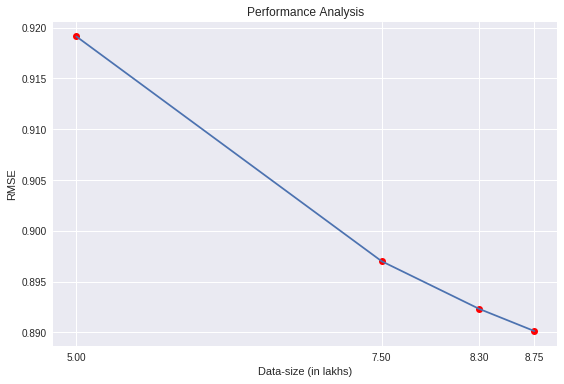

In [77]:
import matplotlib.pyplot as plt
#plt.hist(lst[0,:])
n_groups=4

rmse=np.array((rmse2,rmse4,rmse6,rmse8))
rmse=tuple(rmse.reshape(1, -1)[0])


plt.plot([5,7.5,8.3,8.75],rmse,'ro')
plt.plot([5,7.5,8.3,8.75],rmse)
plt.xlabel('Data-size (in lakhs)')
plt.ylabel('RMSE')
plt.title('Performance Analysis')

plt.xticks([5,7.5,8.3,8.75])

plt.tight_layout()
plt.show()

# **RUNTIME ANALYSIS**

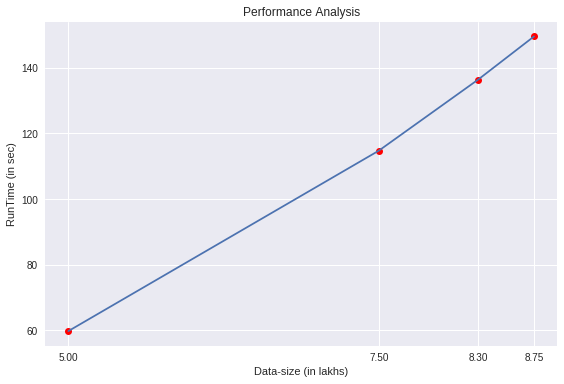

In [87]:

import matplotlib.pyplot as plt
#plt.hist(lst[0,:])
n_groups=4

fit=np.array((fittime2,fittime4,fittime6,fittime8))
fit=tuple(fit.reshape(1, -1)[0])

plt.plot([5,7.5,8.3,8.75],fit,'ro')
plt.plot([5,7.5,8.3,8.75],fit)

plt.xlabel('Data-size (in lakhs)')
plt.ylabel('RunTime (in sec)')
plt.title('Performance Analysis')

plt.xticks([5,7.5,8.3,8.75])

plt.tight_layout()
plt.show()

# **MEMORY ANALYSIS**

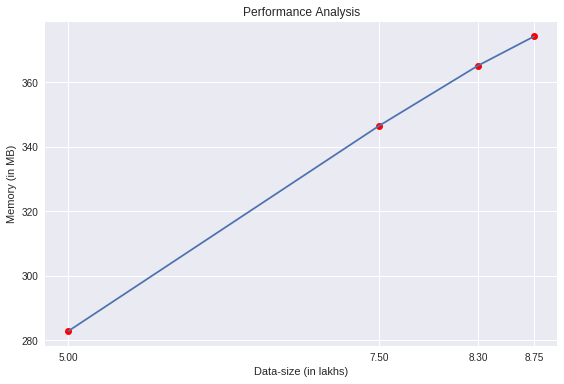